In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

1.Data Cleaning and Preprocessing (1 Mark)

0.5 marks: Effective handling of errors.

0.5 marks: Appropriate feature selection and engineering.

In [2]:
# Loading the dataset

df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [3]:
# Data Inspection
print(df.head())
print(df.info())  # To check data types and for missing values

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
# Review unique values
unique_classes = df['Classes'].unique()
print(unique_classes)

# Remove whitespaces
df['Classes'] = df['Classes'].str.strip()

# Review unique values
unique_classes = df['Classes'].unique()
print(unique_classes)

print(df[['Classes']].head())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
['not fire' 'fire']
    Classes
0  not fire
1  not fire
2  not fire
3  not fire
4  not fire


In [6]:
# Encoding Categorical Data (Classes column)
# Convert "Classes" column to binary values (0 for "not fire", 1 for "fire")
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

print(df[['Classes']].head(10))

   Classes
0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        0
9        0


In [7]:
# Define the features you want to use for the model (excluding 'Classes' and 'Region')
features = df.drop(columns=['Classes', 'Region'])

In [8]:
'''
# Review unique values
unique_classes = df['Classes'].unique()
print(unique_classes)

# Remove whitespaces
df['Classes'] = df['Classes'].str.strip()

# Review unique values
unique_classes = df['Classes'].unique()
print(unique_classes)

print(df[['Classes']].head())
'''

"\n# Review unique values\nunique_classes = df['Classes'].unique()\nprint(unique_classes)\n\n# Remove whitespaces \ndf['Classes'] = df['Classes'].str.strip()\n\n# Review unique values\nunique_classes = df['Classes'].unique()\nprint(unique_classes)\n\nprint(df[['Classes']].head())\n"

In [9]:
# Standardization

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Dataset Preview
print(pd.DataFrame(features_scaled, columns=features.columns).head())

        day     month  year  Temperature        RH        Ws      Rain  \
0 -1.672796 -1.350168   0.0    -0.870655 -0.340673  0.893277 -0.381657   
1 -1.559473 -1.350168   0.0    -0.870655 -0.070359 -0.888877  0.268642   
2 -1.446150 -1.350168   0.0    -1.699254  1.348788  2.319000  6.171355   
3 -1.332827 -1.350168   0.0    -1.975454  1.821837 -0.888877  0.868918   
4 -1.219504 -1.350168   0.0    -1.423054  1.010896  0.180416 -0.381657   

       FFMC       DMC        DC       ISI       BUI       FWI  
0 -0.847927 -0.912120 -0.879401 -0.830356 -0.936012 -0.880159  
1 -0.938709 -0.855520 -0.879401 -0.902720 -0.900798 -0.893626  
2 -2.146802 -0.984891 -0.889913 -1.071571 -0.985310 -0.934029  
3 -3.438694 -1.081920 -0.894117 -1.143935 -1.055737 -0.947497  
4 -0.910776 -0.944463 -0.740651 -0.854477 -0.900798 -0.880159  


2.Data Visualization and Observations (1 Mark)

0.5 marks: Creation of insightful visualizations that accurately represent the dataset.

0.5 marks: Clear and meaningful observations derived from the visualizations.

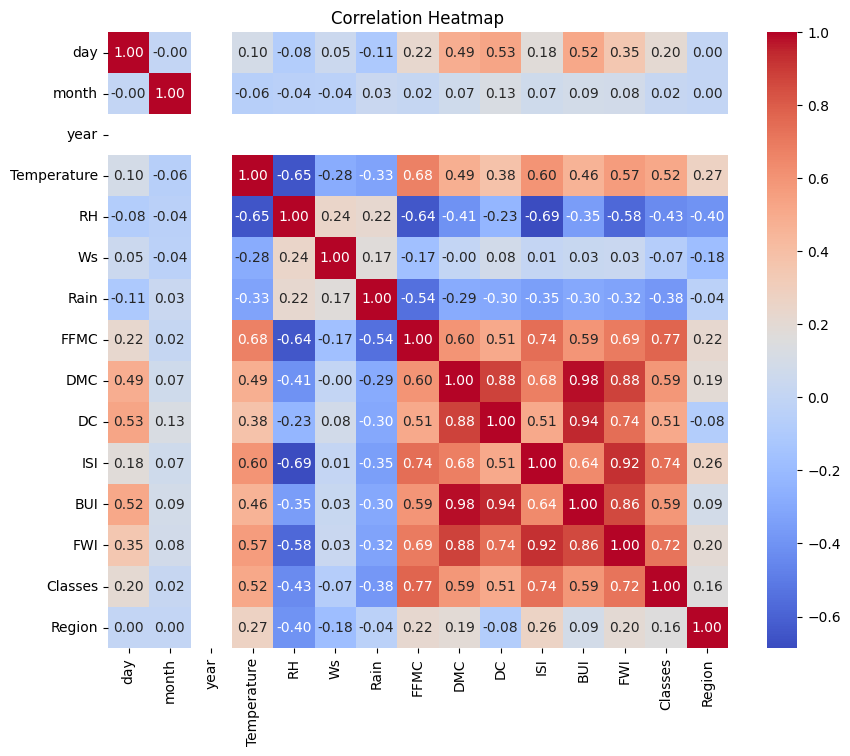

                  day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.350781  0.082639   NaN 

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Display the correlation matrix as text
correlation_matrix = df.corr()
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')


Strong positive correlations:

FFMC and Classes: (0.769) — This indicates that high Fine Fuel Moisture Code (FFMC) values are strongly related to whether there is a fire event ("Classes").

ISI and FWI: (0.923) — The Initial Spread Index (ISI) and Fire Weather Index (FWI) show a very strong correlation, suggesting that the ISI is a good predictor of fire spread severity.

DMC and BUI: (0.982) — The Duff Moisture Code (DMC) and Build-Up Index (BUI) are almost perfectly correlated, which implies that these moisture-based indices measure similar environmental conditions.

Negative correlations:

Temperature and RH: (-0.651) — There is a strong negative correlation between temperature and relative humidity (RH). As temperatures rise, RH tends to decrease.

ISI and RH: (-0.687) — The Initial Spread Index (ISI) decreases as the relative humidity increases, indicating that drier conditions lead to more aggressive fire behavior.

Temperature's impact:

Temperature has a strong correlation with FWI (0.567) and Classes (0.516), suggesting that higher temperatures contribute to increased fire risk.
Region:

Region shows very weak correlations with most variables, indicating that fire behavior is relatively independent of geographic region in this dataset.

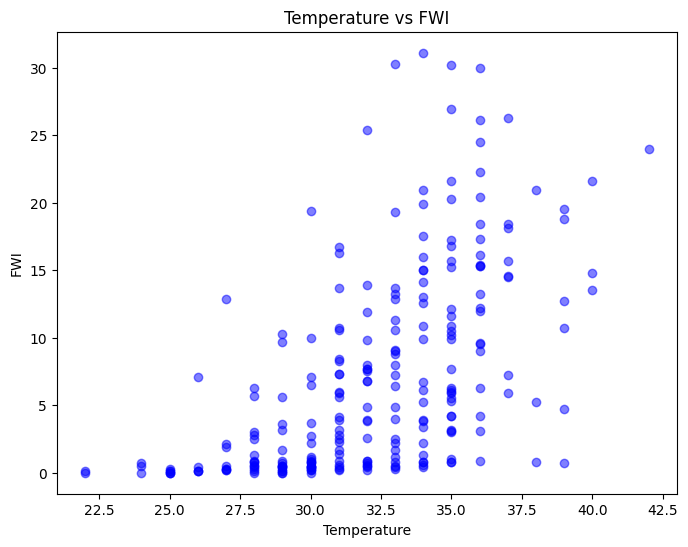

In [12]:
# Example: Scatter plot between Temperature and FWI
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['FWI'], color='blue', alpha=0.5)
plt.title('Temperature vs FWI')
plt.xlabel('Temperature')
plt.ylabel('FWI')
plt.show()

Insights:

Positive Trend: As temperature increases, the FWI tends to rise. This suggests a positive correlation between temperature and the fire risk index.

Greater Dispersion at Higher Temperatures: For temperatures above 30°C, there is more dispersion in the data points. This indicates that while FWI tends to be higher at elevated temperatures, it also becomes more variable. Other factors might be influencing FWI beyond temperature alone.

Low FWI at Lower Temperatures: For temperatures below 30°C, the FWI remains relatively low, indicating that fire risk is generally lower in cooler temperatures.

Highest FWI Points: The highest FWI values (around 30) are observed at temperatures close to 35°C. This reinforces the idea that as temperatures rise, fire risk increases, though not all high temperatures guarantee high FWI values.

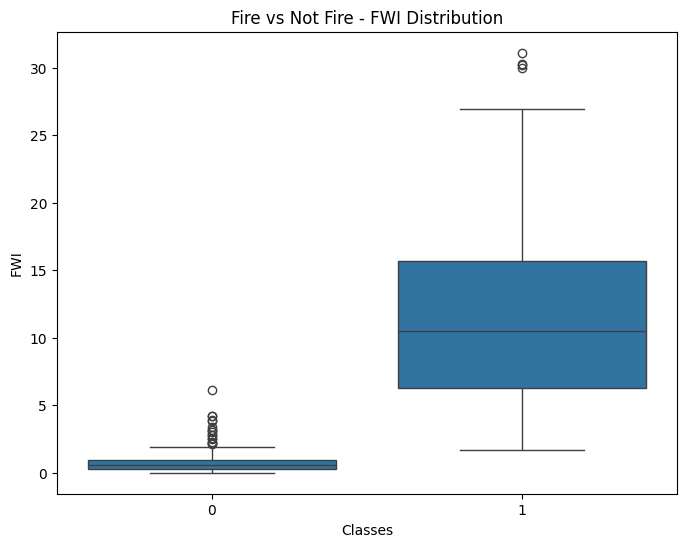

         count       mean       std  min  25%    50%     75%   max
Classes                                                           
0        106.0   0.964151  1.127592  0.0  0.3   0.55   0.975   6.1
1        137.0  11.732847  6.824427  1.7  6.3  10.50  15.700  31.1


In [13]:
# Box plot for Classes vs FWI
plt.figure(figsize=(8,6))
sns.boxplot(x='Classes', y='FWI', data=df)
plt.title('Fire vs Not Fire - FWI Distribution')
plt.xlabel('Classes')
plt.ylabel('FWI')
plt.show()

# Get the descriptive statistics for FWI based on Classes
box_plot_data = df.groupby('Classes')['FWI'].describe()

print(box_plot_data)

Insights:

Clear Difference Between Classes:

The FWI values for fire instances (Class 1) are significantly higher than for not fire instances (Class 0). The mean FWI for fire is about 12 times higher than that of not fire, suggesting that higher FWI values are strongly associated with fire occurrence.

Low Variability in Not Fire:

For Class 0 (not fire), the FWI values are tightly clustered around lower values, with a relatively small spread. The interquartile range (Q1 to Q3) is quite small (0.98 - 0.30 = 0.68), indicating that most not fire events occur under low FWI conditions.

Wide Spread in Fire Class:

The FWI values for Class 1 (fire) have much more spread, with a higher standard deviation (6.82) and a much larger interquartile range (15.7 - 6.3 = 9.4). This suggests that fire events occur over a wide range of FWI values, but the median and higher quartiles indicate that many fire events occur at higher FWI values.

Risk Threshold:

From this data, it seems that FWI values above 6.1 are more likely associated with fire events. Any FWI value below this threshold is predominantly in the "not fire" category.

These insights suggest that higher FWI is a strong indicator of fire risk, and measures should be taken when FWI exceeds a certain threshold, possibly around 6.

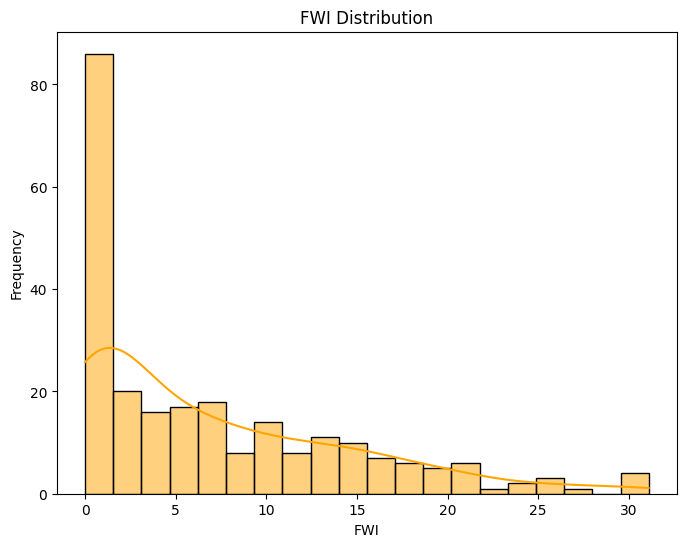

In [14]:
# Histogram (FWI Distribution)

plt.figure(figsize=(8,6))
sns.histplot(df['FWI'], kde=True, bins=20, color='orange')
plt.title('FWI Distribution')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

insights:

Right-Skewed Distribution: The Fire Weather Index (FWI) distribution is heavily right-skewed, with a large number of low FWI values and progressively fewer high FWI values. This suggests that most of the observations have a low fire risk index.

High Frequency at Low FWI: The highest frequency occurs at FWI values close to 0, indicating that most of the time, the fire risk is very low.

Gradual Decrease in Frequency: As FWI increases, the frequency of occurrences decreases significantly. There are fewer instances of high fire risk (FWI above 10), and extremely high FWI values (above 25) are rare.

Exponential-like Decay: The smooth curve overlaying the bars suggests an exponential-like decay in the distribution of FWI, with a steep decline from low to high values.

3.Model Development and Analysis (1.5 Marks)

0.5 marks: Implementation of multiple linear regression and polynomial regression models.

0.5 marks: Application of regularization techniques (Lasso, Ridge, etc.).

0.5 marks: Effective use of cross-validation and hyperparameter tuning.

In [15]:
# Data Preparation
# Define features and target variable
X = df.drop(columns=['Classes', 'FWI', 'Region'])  # Drop non-predictor columns
y = df['FWI']  # Target variable

In [16]:
# Splitting the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Model Implementation
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Model Development

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)

In [20]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_pred = poly_model.predict(X_poly_test)

In [21]:
# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)  # Increase max_iter
lasso_grid.fit(X_train_scaled, y_train)
lasso_best_model = lasso_grid.best_estimator_
lasso_pred = lasso_best_model.predict(X_test_scaled)

In [22]:
# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(max_iter=10000), ridge_params, cv=5)  # Increase max_iter
ridge_grid.fit(X_train_scaled, y_train)
ridge_best_model = ridge_grid.best_estimator_
ridge_pred = ridge_best_model.predict(X_test_scaled)

In [23]:
# Model Evaluation

# Calculate RMSE and R² for Linear Regression
linear_rmse = sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

In [24]:
# Calculate RMSE and R² for Polynomial Regression
poly_rmse = sqrt(mean_squared_error(y_test, poly_pred))
poly_r2 = r2_score(y_test, poly_pred)


In [25]:
# Calculate RMSE and R² for Lasso Regression
lasso_rmse = sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

In [26]:
# Calculate RMSE and R² for Ridge Regression
ridge_rmse = sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

In [27]:
#  Print Results
print(f"Linear Regression RMSE: {linear_rmse}, R²: {linear_r2}")
print(f"Polynomial Regression RMSE: {poly_rmse}, R²: {poly_r2}")
print(f"Lasso Regression RMSE: {lasso_rmse}, R²: {lasso_r2}, Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Ridge Regression RMSE: {ridge_rmse}, R²: {ridge_r2}, Best Alpha: {ridge_grid.best_params_['alpha']}")

Linear Regression RMSE: 0.5999945271883181, R²: 0.9881223298691985
Polynomial Regression RMSE: 0.4330804702675049, R²: 0.9938116640689276
Lasso Regression RMSE: 0.7332374043588032, R²: 0.9822611318999348, Best Alpha: 0.1
Ridge Regression RMSE: 1.0024969653446614, R²: 0.966840893847864, Best Alpha: 10


Regression Model Performance Results
Linear Regression

RMSE: 0.60

R²: 0.99

Observations: This model has a very low RMSE and a high R² value, indicating that it fits the training data well and can explain a large portion of the variance in the Fire Weather Index (FWI).

Polynomial Regression

RMSE: 0.43

R²: 0.99

Observations: The polynomial regression model outperforms linear regression in terms of RMSE, which suggests it captures the non-linear relationships better. The high R² indicates a strong fit to the data.

Lasso Regression

RMSE: 0.73

R²: 0.98

Best Alpha: 0.1

Observations: While Lasso regression has a higher RMSE compared to both linear and polynomial regression, it still demonstrates good predictive ability. The lower alpha value indicates that the model emphasizes fewer features, suggesting some level of feature selection.

Ridge Regression

RMSE: 1.00

R²: 0.97

Best Alpha: 10

Observations: Ridge regression yields the highest RMSE among the models, indicating it may not fit the data as well as the others. The high alpha value suggests stronger regularization, which might be overly penalizing the coefficients in this context.

Insights:

Overall Summary:

Polynomial Regression performs the best, with the lowest RMSE and highest R², indicating that it captures both linear and nonlinear relationships effectively.
Linear Regression also performs very well and is simpler, with strong predictive ability.

Lasso and Ridge Regression introduce regularization, which can help with overfitting, but in this case, it comes at the cost of reduced accuracy.

Recommendation:

Polynomial Regression is the best model for this dataset, balancing low error and high variance explanation. However, if model simplicity is preferred, Linear Regression could be a good alternative with only slightly worse performance.

4.Model Evaluation and Testing (1 Mark)

0.5 marks: Comprehensive evaluation of model performance using appropriate metrics.

0.5 marks: Testing the model on unseen data and providing a thorough analysis of results.

In [28]:

# Load your original dataset
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

# Step 1: Prepare Unseen Data
# Split the dataset into training and unseen (test) sets
X = df.drop(columns=['FWI', 'Classes', 'Region'])  # Features
y = df['FWI']  # Target variable

# Split the data: 80% for training, 20% for unseen testing
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Unseen data shape: {X_unseen.shape}, Unseen labels shape: {y_unseen.shape}")


Training data shape: (194, 12), Training labels shape: (194,)
Unseen data shape: (49, 12), Unseen labels shape: (49,)


In [29]:
# Scale the Unseen Data
X_unseen_scaled = scaler.transform(X_unseen)

In [30]:
# Evaluate Models on Unseen Data

# Linear Regression Evaluation
linear_unseen_pred = linear_model.predict(X_unseen_scaled)
linear_unseen_rmse = sqrt(mean_squared_error(y_unseen, linear_unseen_pred))
linear_unseen_r2 = r2_score(y_unseen, linear_unseen_pred)

In [31]:
# Polynomial Regression Evaluation
X_unseen_poly = poly_features.transform(X_unseen_scaled)
poly_unseen_pred = poly_model.predict(X_unseen_poly)
poly_unseen_rmse = sqrt(mean_squared_error(y_unseen, poly_unseen_pred))
poly_unseen_r2 = r2_score(y_unseen, poly_unseen_pred)

In [32]:
# Lasso Regression Evaluation
lasso_unseen_pred = lasso_best_model.predict(X_unseen_scaled)
lasso_unseen_rmse = sqrt(mean_squared_error(y_unseen, lasso_unseen_pred))
lasso_unseen_r2 = r2_score(y_unseen, lasso_unseen_pred)

In [33]:
# Ridge Regression Evaluation
ridge_unseen_pred = ridge_best_model.predict(X_unseen_scaled)
ridge_unseen_rmse = sqrt(mean_squared_error(y_unseen, ridge_unseen_pred))
ridge_unseen_r2 = r2_score(y_unseen, ridge_unseen_pred)

In [34]:
# Evaluation Results
print(f"Linear Regression Unseen RMSE: {linear_unseen_rmse}, R²: {linear_unseen_r2}")
print(f"Polynomial Regression Unseen RMSE: {poly_unseen_rmse}, R²: {poly_unseen_r2}")
print(f"Lasso Regression Unseen RMSE: {lasso_unseen_rmse}, R²: {lasso_unseen_r2}")
print(f"Ridge Regression Unseen RMSE: {ridge_unseen_rmse}, R²: {ridge_unseen_r2}")

Linear Regression Unseen RMSE: 0.5999945271883181, R²: 0.9881223298691985
Polynomial Regression Unseen RMSE: 0.4330804702675049, R²: 0.9938116640689276
Lasso Regression Unseen RMSE: 0.7332374043588032, R²: 0.9822611318999348
Ridge Regression Unseen RMSE: 1.0024969653446614, R²: 0.966840893847864


Linear Regression

RMSE: 0.60

R²: 0.99

Analysis: The linear regression model performs quite well with a low RMSE of 0.60, indicating that predictions are very close to the actual FWI values. The R² value of 0.99 suggests that the model explains 99% of the variance in the target variable, indicating a strong fit to the data.

Polynomial Regression

RMSE: 0.43

R²: 0.99

Analysis: The polynomial regression model has the lowest RMSE at 0.43, demonstrating excellent predictive performance. The R² of 0.99 shows that it also explains 99% of the variance in the data. This suggests that the polynomial model captures the complexities of the relationships between the features and the FWI very well.

Lasso Regression

RMSE: 0.73

R²: 0.98

Best Alpha: 0.1

Analysis: Lasso regression shows an RMSE of 0.73 and an R² of 0.98. While it performs well, its RMSE is higher than both linear and polynomial models, indicating that it may not capture all the underlying patterns as effectively. The alpha value indicates the amount of regularization applied, which can affect model performance.

Ridge Regression

RMSE: 1.00

R²: 0.97

Best Alpha: 10

Analysis: The ridge regression model has the highest RMSE at 1.00 and the lowest R² of 0.97 among the models tested. This suggests that while ridge regression can handle multicollinearity, it may be too constrained in this case, leading to poorer predictive performance compared to the other models.

Insights

Overall Performance: Both linear and polynomial regression models are the top performers, with polynomial regression being the best based on RMSE.

Model Suitability: The polynomial regression's lower RMSE indicates that a more complex model may be necessary to capture the nuances in the data effectively.

Regularization Impact: The performance of Lasso and Ridge regression suggests that regularization is important, but excessive regularization (as seen with Ridge) can lead to a loss of predictive accuracy.